In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

### Data Generation
We first generate data from a linear model.

In [2]:
def gen_data (n_samp=1000):

    X = np.random.normal(0, 0.1, n_samp)

    noise = np.random.normal(0, 0.1, n_samp) #np.random.uniform(-10,10, size=(n_samp,))
    beta = 2
    y = beta * X + noise
    data = pd.DataFrame({'x':X, 'y':y})
    return data

In [3]:
data = gen_data()

### Plotting the data



<AxesSubplot:xlabel='x', ylabel='y'>

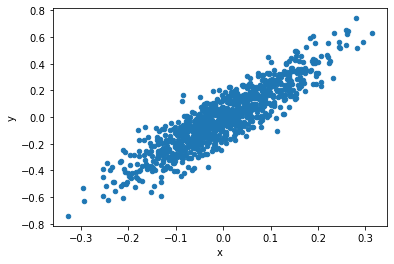

In [4]:
data.plot('x', 'y', kind='scatter')

# Accounting for Coefficient Uncertainty
Since we consider linear models and independent samples $y_i$, we assume the following distribution for our response $Y$,
    \begin{align}  \label{eq1}
    P(Y \mid X, \beta) &=\prod_{i=1}^n  p(y_i \mid x_i, \beta)\\
    p(y_i \mid x_i, \beta) &\sim \mathcal N (y_i \mid x_i^T \beta, \sigma^2) \quad (1)
    \end{align}
    
In addition, since we want to argue about coefficient uncertainty, we also place some distribution $D$ over the parameters $\beta$.
    

### Part (a)
We first assume that the coefficient distribution is Gaussian, $\beta \sim \mathcal N (0, 1/\lambda)$.
 
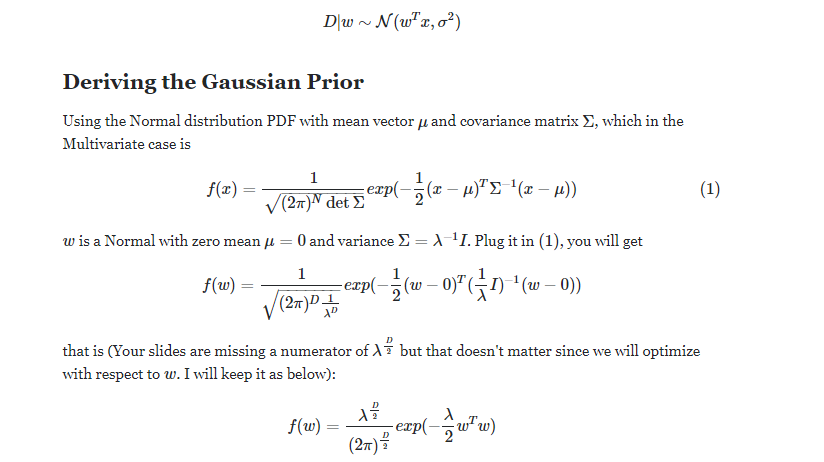
But in this example we considered a univariante linear regression which means we have only single feature .

so $ D =1$.
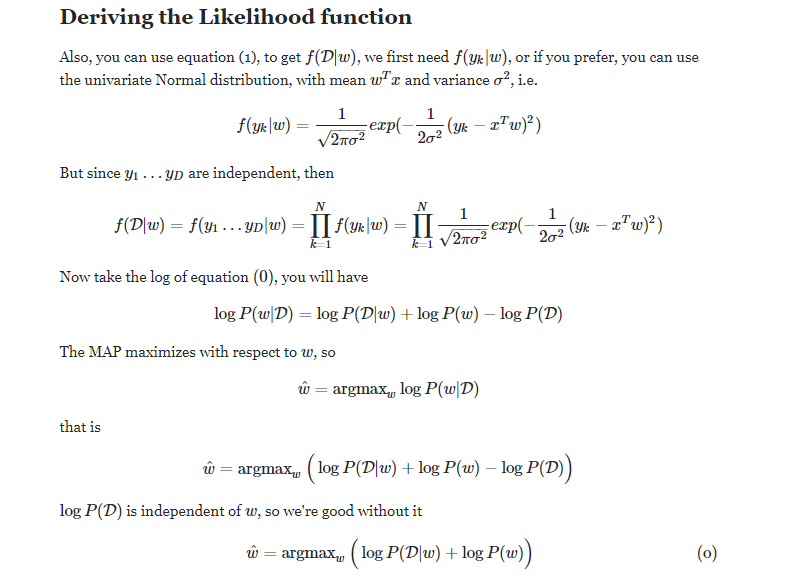
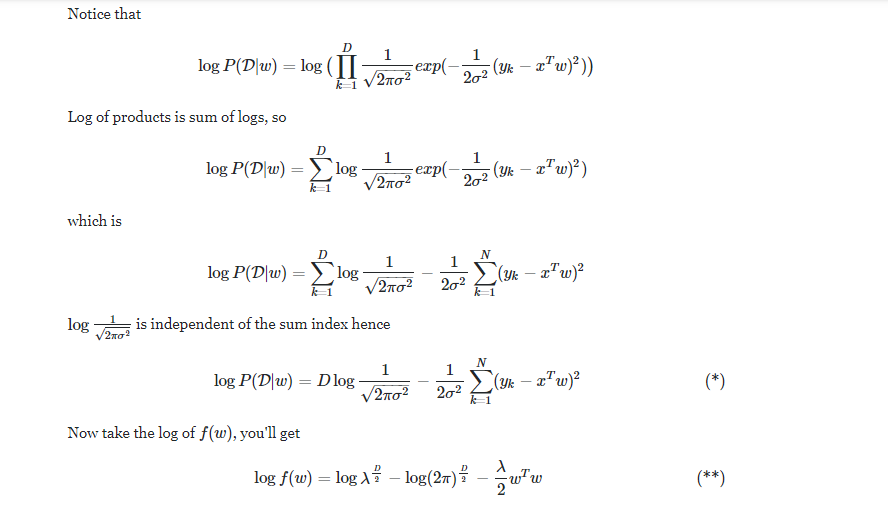
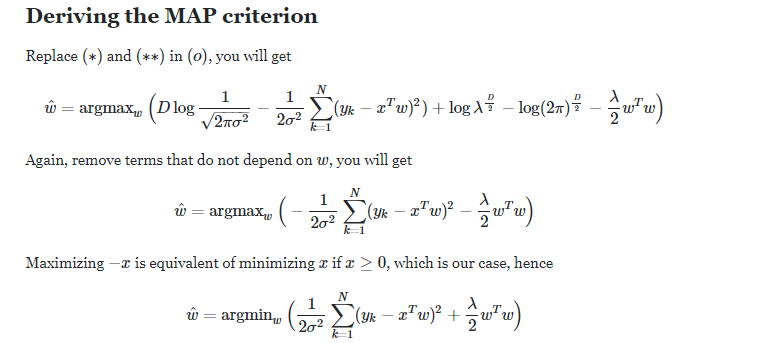

In [5]:
def log_term(params, data):
    beta0, sig,lamda = params 
    var=sig**2
    X=data["x"].to_numpy()
    y=data["y"].to_numpy()
    n=len(y)
    ll1 = -(n/2)*np.log(2*np.pi)
    ll2 = -(n/2)*np.log(var)
    ll3 = -(1/2)*np.log(2*np.pi)
    ll4 =  (1/2)*np.log(lamda)
    B =beta0
    ll5 = - (np.linalg.norm((y-B*X)))**2/(2*var)
    ll6 = - (lamda/2)*(B)**2
    return -(ll1 + ll2 + ll3 + ll4 + ll5 + ll6) 

In [6]:
print(log_term((1, 1,1), data))

930.3735020006555


###  Part (b)

Solve the expression 
    $\text{max}_\beta \text{log} \Big( p(\beta)  p(Y \mid X, \beta) \Big)\; (5.2)$ 
for $\beta$.

In [7]:
#Hint function:
import scipy.optimize as optimize
bnds = ((0, None), (0, None),(0, None))
res = optimize.minimize(log_term, [1,1,1], args=(data), method='L-BFGS-B', )
print('beta  sigma lambda:')
print(res.x)

beta  sigma lambda:
[1.99322112 0.10020402 0.25174318]


## Part (c) 
Repeat parts (b) with increasing numbers of datapoints, e.g., $n=10, n=100, n=1000$.

In [8]:
for i in [10,100,1000]:
    data = gen_data(n_samp=i)
    res = optimize.minimize(log_term, [1,1,1], args=(data), method='L-BFGS-B', )
    print(f'beta {i}  sigma {i} lambda {i}:')
    print(res.x)
    print("\n")

beta 10  sigma 10 lambda 10:
[1.70768139 0.15367504 0.34291443]


beta 100  sigma 100 lambda 100:
[1.94932739 0.09412992 0.26316765]


beta 1000  sigma 1000 lambda 1000:
[1.96248818 0.09968336 0.25965356]




C:\Users\OWNER\AppData\Local\Temp\ipykernel_12548\3114854902.py:10: RuntimeWarning: invalid value encountered in log
  ll4 =  (1/2)*np.log(lamda)
